In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
# Устанавливаем seed для повторяемости результатов
np.random.seed(42)
# Загружаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Преобразование размерности изображений
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# Создаем последовательную модель
model = Sequential();
# Добавляем уровни сети
#скрытый слой 15 нейронов
model.add(Dense(15, input_dim=784, activation="sigmoid", kernel_initializer="normal"))
#выходной слой 10 нейронов
model.add(Dense(10, input_dim=784, activation="softmax", kernel_initializer="normal"))

# Компилируем модель
sgd = keras.optimizers.SGD(learning_rate=1)
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
print(model.summary())
# Обучаем сеть
#Batch size – количество обучающих примеров за одну итерацию.
model.fit(X_train, Y_train, batch_size=32, epochs=2000);
#model.fit(X_train, Y_train, batch_size=32, epochs=2000, verbose=2, validation_split=0.2);

# Оцениваем качество обучения сети на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0);
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                11775     
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2000
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2136 - accuracy: 0.2502
Epoch 2/2000
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6795 - accuracy: 0.6075
Epoch 3/2000
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1296 - accuracy: 0.7520
Epoch 4/2000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8444 - accuracy: 0.8153
Epoch 5/2000
1875/1875 [===

Точность растет очень медленно: на больших эпохах по несколько тысячных процента.

длина:
11760
количество точных нулей: 0.00
Процентное точных нулей: 0.00%
количество пороговых нулей (Т=0.001): 60.00
Процентное точных нулей: 0.5102%
количество пороговых нулей (Т=0.0001): 4.00
Процентное точных нулей: 0.0340%
количество пороговых нулей (Т=0.00001): 1.00
Процентное точных нулей: 0.0085%


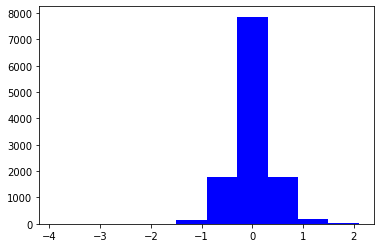

In [5]:
a = np.array(model.get_weights()[0]).flatten();
plt.hist(a, facecolor='blue')
#plt.hist(a, bins=400, facecolor='blue')
print("длина:")
print(len(a))
#print("вектор:")
#print(a)
T0 = 0.001
T1 = 0.0001
T2 = 0.00001
zerj_num = sum(model.get_weights()[0].flatten() == 0)
zero_num_under0 = sum(abs(model.get_weights()[0].flatten()) <= T0)
zero_num_under1 = sum(abs(model.get_weights()[0].flatten()) <= T1)
zero_num_under2 = sum(abs(model.get_weights()[0].flatten()) <= T2)
print("количество точных нулей: %.2f" % (zerj_num))
print("Процентное точных нулей: %.2f%%" % ((zerj_num/11760)*100))
print("количество пороговых нулей (Т=0.001): %.2f" % (zero_num_under0))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under0/11760)*100))
print("количество пороговых нулей (Т=0.0001): %.2f" % (zero_num_under1))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under1/11760)*100))
print("количество пороговых нулей (Т=0.00001): %.2f" % (zero_num_under2))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under2/11760)*100))

(11760,)
(150,)


hidden layer: max = 574.3764,
 min = 0.0479
[5.74376437e+02 1.59529936e+02 7.06690717e+01 2.73141191e+01
 8.68419024e+00 2.64892380e+00 6.38774638e-01 4.79326941e-02
 6.12439159e-01 2.73066323e+00 8.84425683e+00 2.77308607e+01
 7.11082774e+01 1.58508810e+02 5.33357473e+02]


out layer: max = 600.2918,
 min = 1.3278
[600.29180527 294.16683006 203.54401207 147.80137825  79.60278654
  42.49080396  12.32092732   1.32784621   4.86035795  43.94399798
  88.78174114 144.2539835  258.543787   347.0356617  579.79181671]


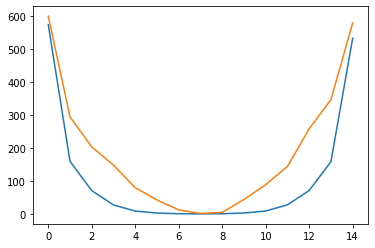

In [35]:
weight_origin=model.layers[0].get_weights()[0].flatten()
weight_origin2=model.layers[1].get_weights()[0].flatten()
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)
#отсортировать
weight_origin.sort()
weight_origin2.sort()

layer1 = np.empty(15)
layer2 = np.empty(15)
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
#print(x)

for i in range(15):
  sum1 = 0
  for j in range(784):
    sum1 = sum1 + weight_origin[i*784 + j]*weight_origin[i*784 + j]
  layer1[i] = sum1
for i in range(15):
  sum2 = 0
  for j in range(10):
    sum2 = sum2 + weight_origin2[i*10 + j]*weight_origin2[i*10 + j]
  layer2[i] = sum2
print("\n")
print("hidden layer: max = %.4f," % (layer1.max()))
print(" min = %.4f" % (layer1.min()))
print(layer1)
print("\n")
print("out layer: max = %.4f," % (layer2.max()))
print(" min = %.4f" % (layer2.min()))
print(layer2)

plt.plot(x,layer1)
plt.plot(x,layer2)


Теперь увеличим число нейронов на скрытом слое (15 ->1 500). 

---



#Большая сеть

In [7]:
# Создаем последовательную модель
model2 = Sequential();

# Добавляем уровни сети
#скрытый слой 1500 нейронов
model2.add(Dense(1500, input_dim=784, activation="sigmoid", kernel_initializer="normal"))
#выходной слой 10 нейронов
model2.add(Dense(10, input_dim=784, activation="softmax", kernel_initializer="normal"))

# Компилируем модель
model2.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model2.summary())

# Обучаем сеть
#Batch size – количество обучающих примеров за одну итерацию.
model2.fit(X_train, Y_train, batch_size=32, epochs=10);

# Оцениваем качество обучения сети на тестовых данных
scores = model2.evaluate(X_test, Y_test, verbose=0);
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1500)              1177500   
                                                                 
 dense_3 (Dense)             (None, 10)                15010     
                                                                 
Total params: 1,192,510
Trainable params: 1,192,510
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.9868 - accuracy: 0.7664
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5099 - accuracy: 0.8675
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4266 - accuracy: 0.8835
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3890 - accuracy: 0.8918
Epoch 5/10
1875/1875 [=

длина:
1176000
количество точных нулей: 0.00
Процентное точных нулей: 0.00%
количество пороговых нулей (Т=0.001): 18694.00
Процентное точных нулей: 1.5896%
количество пороговых нулей (Т=0.0001): 1834.00
Процентное точных нулей: 0.1560%
количество пороговых нулей (Т=0.00001): 185.00
Процентное точных нулей: 0.0157%


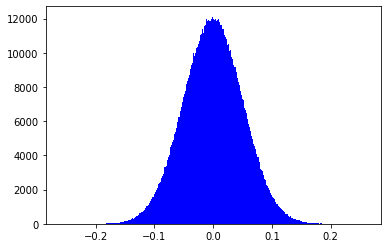

In [8]:
a = np.array(model2.get_weights()[0]).flatten();
plt.hist(a, bins=400, facecolor='blue')
##
print("длина:")
print(len(a))
T0 = 0.001
T1 = 0.0001
T2 = 0.00001
zerj_num = sum(model2.get_weights()[0].flatten() == 0)
zero_num_under0 = sum(abs(model2.get_weights()[0].flatten()) <= T0)
zero_num_under1 = sum(abs(model2.get_weights()[0].flatten()) <= T1)
zero_num_under2 = sum(abs(model2.get_weights()[0].flatten()) <= T2)
print("количество точных нулей: %.2f" % (zerj_num))
print("Процентное точных нулей: %.2f%%" % ((zerj_num/1176000)*100))
print("количество пороговых нулей (Т=0.001): %.2f" % (zero_num_under0))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under0/1176000)*100))
print("количество пороговых нулей (Т=0.0001): %.2f" % (zero_num_under1))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under1/1176000)*100))
print("количество пороговых нулей (Т=0.00001): %.2f" % (zero_num_under2))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under2/1176000)*100))

(1176000,)
(15000,)


hidden layer: max = 24.7618,
 min = 0.0000
[24.24887682 19.14635934 17.285492   ... 17.33734108 19.33020006
 24.76183928]


out layer: max = 0.9223,
 min = 0.0000
[0.90323418 0.68617481 0.62416445 ... 0.63965051 0.68151697 0.92230138]


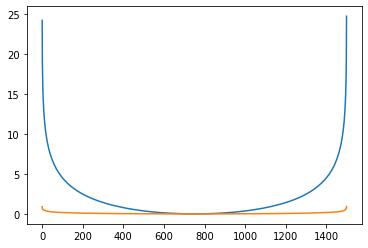

In [41]:
weight_origin=model2.layers[0].get_weights()[0].flatten()
weight_origin2=model2.layers[1].get_weights()[0].flatten()
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)
#отсортировать
weight_origin.sort()
weight_origin2.sort()

layer1 = np.empty(1500)
layer2 = np.empty(1500)
x = range(1500)


for i in range(1500):
  sum1 = 0
  for j in range(784):
    sum1 = sum1 + weight_origin[i*784 + j]*weight_origin[i*784 + j]
  layer1[i] = sum1

for i in range(1500):
  sum2 = 0
  for j in range(10):
    sum2 = sum2 + weight_origin2[i*10 + j]*weight_origin2[i*10 + j]
  layer2[i] = sum2

print("\n")
print("hidden layer: max = %.4f," % (layer1.max()))
print(" min = %.4f" % (layer1.min()))
print(layer1)
print("\n")
print("out layer: max = %.4f," % (layer2.max()))
print(" min = %.4f" % (layer2.min()))
print(layer2)
plt.plot(x,layer1)
plt.plot(x,layer2)

#5000 НЕЙРОНОВ

In [42]:
# Создаем последовательную модель
model3 = Sequential();

# Добавляем уровни сети
#скрытый слой 1500 нейронов
model3.add(Dense(5000, input_dim=784, activation="sigmoid", kernel_initializer="normal"))
#выходной слой 10 нейронов
model3.add(Dense(10, input_dim=784, activation="softmax", kernel_initializer="normal"))

# Компилируем модель
model3.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model3.summary())

# Обучаем сеть
#Batch size – количество обучающих примеров за одну итерацию.
model3.fit(X_train, Y_train, batch_size=32, epochs=10);

# Оцениваем качество обучения сети на тестовых данных
scores = model3.evaluate(X_test, Y_test, verbose=0);
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5000)              3925000   
                                                                 
 dense_5 (Dense)             (None, 10)                50010     
                                                                 
Total params: 3,975,010
Trainable params: 3,975,010
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.7128 - accuracy: 0.7962
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.4164 - accuracy: 0.8803
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3739 - accuracy: 0.8918
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3516 - accuracy: 0.8977
Epoch 5/10
1875/187

длина:
3920000
количество точных нулей: 0.00
Процентное точных нулей: 0.00%
количество пороговых нулей (Т=0.001): 62035.00
Процентное точных нулей: 1.5825%
количество пороговых нулей (Т=0.0001): 6166.00
Процентное точных нулей: 0.1573%
количество пороговых нулей (Т=0.00001): 635.00
Процентное точных нулей: 0.0162%


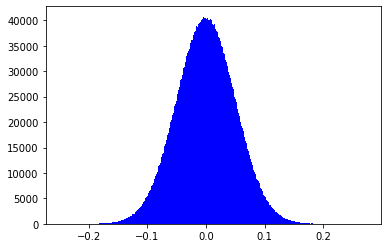

In [43]:
a = np.array(model3.get_weights()[0]).flatten();
plt.hist(a, bins=400, facecolor='blue')
print("длина:")
print(len(a))
T0 = 0.001
T1 = 0.0001
T2 = 0.00001
zerj_num = sum(model3.get_weights()[0].flatten() == 0)
zero_num_under0 = sum(abs(model3.get_weights()[0].flatten()) <= T0)
zero_num_under1 = sum(abs(model3.get_weights()[0].flatten()) <= T1)
zero_num_under2 = sum(abs(model3.get_weights()[0].flatten()) <= T2)
print("количество точных нулей: %.2f" % (zerj_num))
print("Процентное точных нулей: %.2f%%" % ((zerj_num/3920000)*100))
print("количество пороговых нулей (Т=0.001): %.2f" % (zero_num_under0))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under0/3920000)*100))
print("количество пороговых нулей (Т=0.0001): %.2f" % (zero_num_under1))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under1/3920000)*100))
print("количество пороговых нулей (Т=0.00001): %.2f" % (zero_num_under2))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under2/3920000)*100))

(3920000,)
(50000,)


hidden layer: max = 28.3996,
 min = 0.0000
[28.39958053 23.30423068 21.37947388 ... 21.34376594 23.26919835
 28.1519462 ]


out layer: max = 0.5091,
 min = 0.0000
[0.50908912 0.40083469 0.36474389 ... 0.38443569 0.42113885 0.49391018]


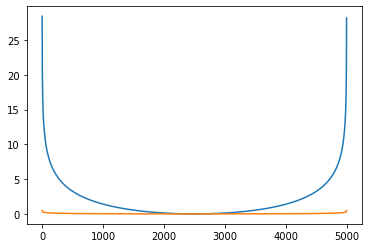

In [44]:
weight_origin=model3.layers[0].get_weights()[0].flatten()
weight_origin2=model3.layers[1].get_weights()[0].flatten()
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)
#отсортировать
weight_origin.sort()
weight_origin2.sort()

layer1 = np.empty(5000)
layer2 = np.empty(5000)
x = range(5000)


for i in range(5000):
  sum1 = 0
  for j in range(784):
    sum1 = sum1 + weight_origin[i*784 + j]*weight_origin[i*784 + j]
  layer1[i] = sum1

for i in range(5000):
  sum2 = 0
  for j in range(10):
    sum2 = sum2 + weight_origin2[i*10 + j]*weight_origin2[i*10 + j]
  layer2[i] = sum2

print("\n")
print("hidden layer: max = %.4f," % (layer1.max()))
print(" min = %.4f" % (layer1.min()))
print(layer1)
print("\n")
print("out layer: max = %.4f," % (layer2.max()))
print(" min = %.4f" % (layer2.min()))
print(layer2)
plt.plot(x,layer1)
plt.plot(x,layer2)